In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# HOW GENRE POPULARITY CHANGED OVER TIME

We can visualize the popularity of genres for every year since 1940 till today. We will do this by making an area chart.

In [2]:
db2 = pd.read_csv('db_files/movies_db_cleaned.csv')
db2 = db2[db2.startYear <= 2020 ]

In [3]:
# Here we count the number of occurrences of each genre per year
def count_word_occurrences(s):
    word_counts = {}
    words = s.split(',')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

# Group the dataframe by decade and apply the function to count the word occurrences
final_counts = []
grouped_by_decade = db2.groupby((db2['startYear']))
for year, group in grouped_by_decade:
    total_word_counts = {}
    for word_counts in group['genres'].apply(lambda x: count_word_occurrences(x)):
        for word, count in word_counts.items():
            if word in total_word_counts:
                total_word_counts[word] += count
            else:
                total_word_counts[word] = count
    sorted_word_counts = dict(sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True))
    final_counts.append(sorted_word_counts)

In [4]:
# Convert the dictionaries to dataframes and stack them
dfs_by_year = [pd.DataFrame.from_dict(d, orient='index', columns=[f'{year}']) for year, d in enumerate(final_counts, start=1940)]
df_stacked = pd.concat(dfs_by_year, axis=1)
df_stacked = df_stacked.fillna(0)
df_normed = df_stacked.div(df_stacked.sum(axis=0), axis=1)

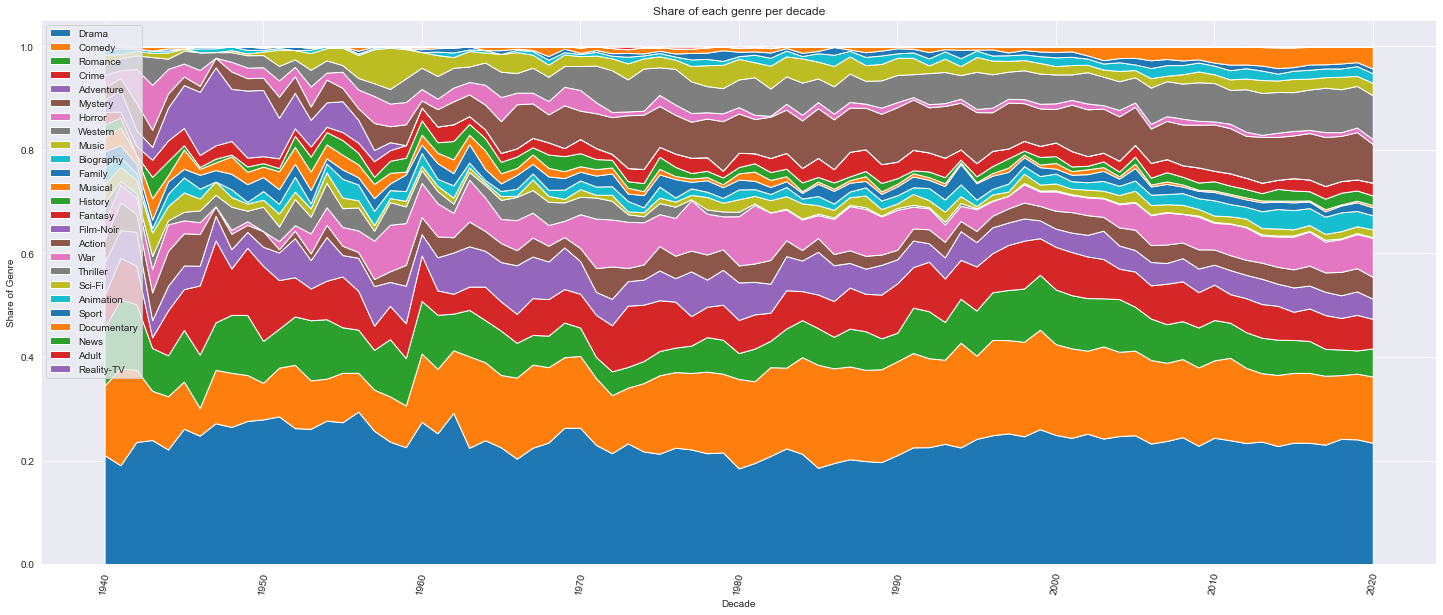

In [5]:
# Create stacked band plot
plt.figure(figsize=(25, 10))
plt.stackplot(df_normed.columns, df_normed.values, labels=df_normed.index)
# Add legend and axis labels
plt.legend(loc='upper left')
plt.xlabel('Decade')
plt.ylabel('Share of Genre')
plt.title('Share of each genre per decade')
plt.xticks(df_normed.columns[0::10],rotation = 80)
# Show the plot
plt.show()

The evolution of movie genres over time is a fascinating subject that sheds light on the shifting tastes and interests of audiences. While some genres have remained perennially popular, such as drama and romance, others have risen to prominence and then faded away. For example, action and horror films have enjoyed a surge in popularity since the 1970s,which was fueled by advances in special effects and a growing appetite for high-octane, adrenaline-fueled entertainment. Another example is film noir, a brief but influential trend that emerged in the 1940s, it is a dark and moody genre that reflected the anxieties and uncertainties of the time.


# THE RELATIONSHIP BETWEEN GENRE AND RATINGS

To study how the distribution of ratings for each genre we can create a boxplot for each one.

In [6]:
genres = pd.DataFrame(columns = ['genre1', 'genre2', 'genre3','rating'])
genres[['genre1', 'genre2', 'genre3']] = db2['genres'].str.split(',', expand=True)
genres['rating'] = db2.averageRating
genres.head()

,genre1,genre2,genre3,rating
0,Comedy,Romance,None,7.3
1,Mystery,Thriller,None,7.3
2,Drama,None,None,7.0
3,Crime,Drama,Romance,6.0
4,Biography,Drama,History,7.3


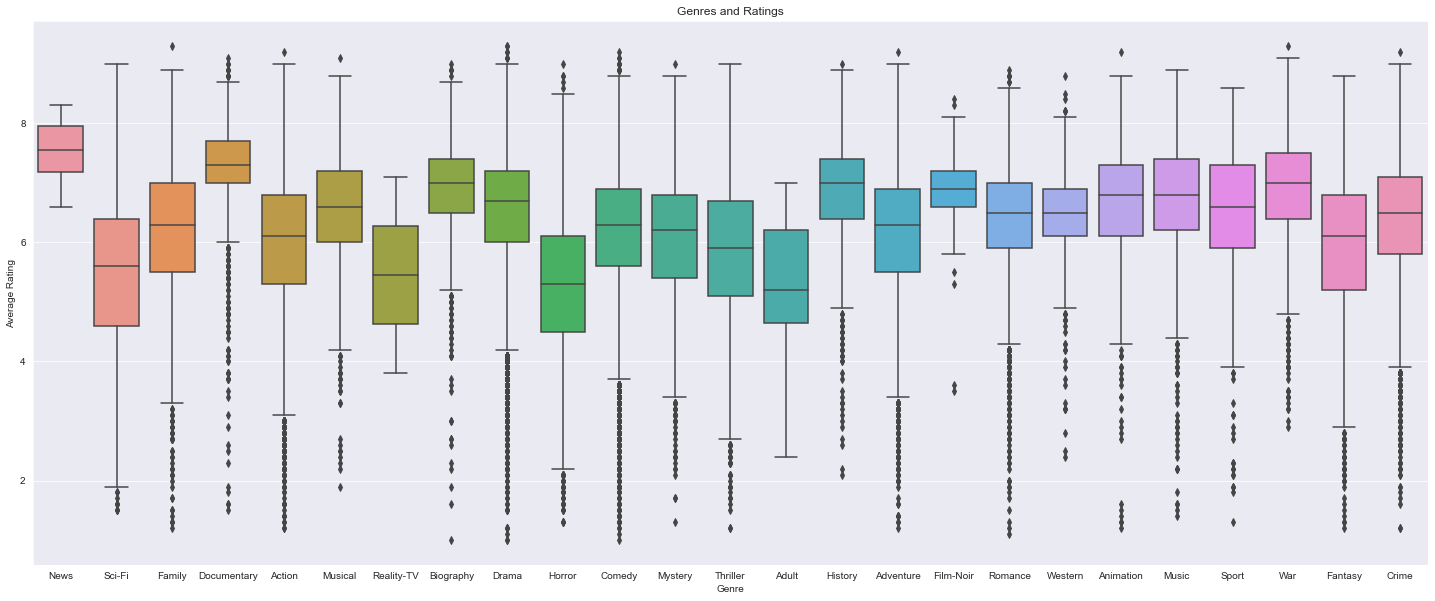

In [7]:
# Get unique genres
unique_genres = set(genres['genre1'].unique().tolist() + genres['genre2'].unique().tolist() + genres['genre3'].unique().tolist())
unique_genres.discard(None)

# Group by genre and extract ratings as arrays
genre_ratings = []
for genre in unique_genres:
    ratings = genres.loc[(genres['genre1'] == genre) | (genres['genre2'] == genre) | (genres['genre3'] == genre), 'rating'].values
    genre_ratings.append(ratings)

plt.figure(figsize=(25, 10))
sns.boxplot(data=genre_ratings)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Genres and Ratings')
plt.gca().set_xticklabels(unique_genres)
plt.show()